# Programming Exercise: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

open the file

In [6]:
path = './coursera_data/'

In [30]:
col_name = ['score1', 'score2', 'result']
df1 = pd.read_table(path+'ex2data1.txt', delimiter=',', header = None,  names = col_name)
df1.head()

,score1,score2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## 1.1 Visualizing the data

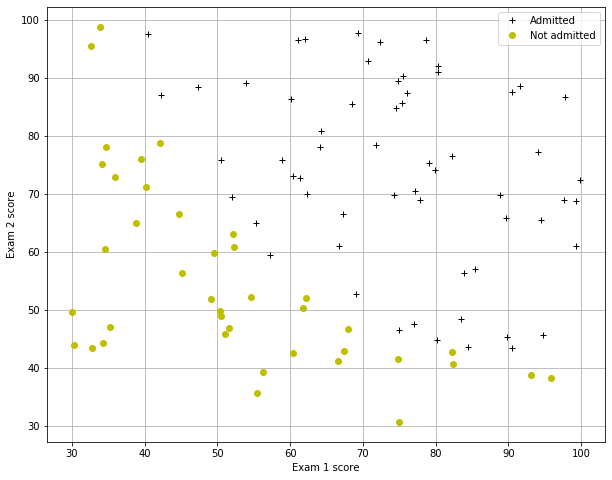

In [43]:
df1_pos = df1[df1.result == 0]
df1_neg = df1[df1.result == 1]

def ploting_data():
    plt.figure(figsize=(10,8))
    plt.plot(df1_neg.score1, df1_neg.score2, 'k+', label='Admitted')
    plt.plot(df1_pos.score1, df1_pos.score2, 'yo', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
    return plt.show()

ploting_data()

## 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

Logistic Regression hypothesis ::: $ h_\theta(x) = g(\theta^Tx) $ <br>
Sigmoid function ::: $ g(z) = {1 \over {1 + e^{-z}}} $

In [40]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

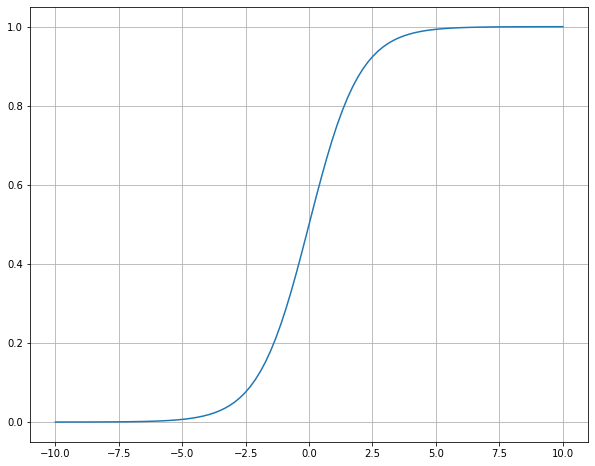

In [72]:
# draw sigmoid function
x_data = np.linspace(-10,10,100)
def ploting_sigmoid():
    plt.figure(figsize=(10,8))
    plt.plot(x_data, sigmoid(x_data))
    plt.grid(True)
    plt.show()

ploting_sigmoid()

### 1.2.2 Cost function and gradient

Cost Function in Logistic Regression ::: $ J(\theta) = { 1 \over m}\sum_{i=1}^{m}[-y^{(i)}\log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)})] + {\lambda \over 2m}\sum_{j=1}^{n}\theta^{2}_{j}  $ <br><br>

<b>t1</b> = $ -y^{(i)}\log(h_\theta(x^{(i)})) $ <br><br>
<b>t2</b> = $ -(1-y^{(i)})log(1-h_{\theta}(x^{(i)}) $<br><br>
<b>t_regulation</b> = $ {\lambda \over 2m}\sum_{j=1}^{n}\theta^{2}_{j} $


In [114]:
def Logistic_hyp(theta, data_in):
    return sigmoid(np.dot(data_in,theta))

def costFunction(theta, data_x, data_y, lambda_ = 0.):
    
    t1 = np.dot(-np.array(data_y.T),
                          np.log(Logistic_hyp(theta, data_x)))
    
    t2 = np.dot(1-np.array(data_y.T),
                           np.log(1-Logistic_hyp(theta, data_x)))
    
    t_regulation = (lambda_/2)*np.sum(np.dot(theta[1:], theta[1:]))
    
    return float( (1/m) * np.sum(t1 - t2) + t_regulation )

In [115]:
starting_theta = np.zeros((df1[['score1','score2']].shape[1], 1))

costFunction(starting_theta, df1[['score1','score2']], df1.result)

0.6931471805599453

the gradient of the cost function ::: ${dJ(\theta)\over{d\theta_0}} = {1\over m}\sum^{m}_{i=1}(h_{\theta}x^{(i)} - y^{(i)})x^{(i)}_{j}     $

In [131]:
from scipy import optimize

def optimizer(theta, data_x, data_y, lambda_ = 0,):
    result = optimize.fmin(costFunction, x0=theta, args=(data_x, data_y, lambda_))
    return result

In [132]:
final_theta, minimum_cost = optimizer(starting_theta, df1[['score1','score2']], df1.result)

Optimization terminated successfully.
         Current function value: 0.629816
         Iterations: 25
         Function evaluations: 49


In [118]:
final_theta

array([0.01045971, 0.00041607])

In [136]:
costFunction(starting_theta, df1[['score1','score2']], df1.result)

0.6931471805599453

In [119]:
minimum_cost

0.6298159535419822

In [ ]:
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()